<a href="https://colab.research.google.com/github/bidwatrajpokhrel/MLP-HyperparamOptimization/blob/master/1_DataProcessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # loads a library to mount your google drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#navigate to a desired path in drive and first upload an image dataset (in this case it is Tr0.zip)
#set the path accordingly
!ls "/content/drive/My Drive/BidwatPhotosSample/" # shows all files in your google drive root, including the project data file Tr0
path = "/content/drive/My Drive/BidwatPhotosSample/" # sets the path to the root with the file Tr0

Tr0  Tr0.zip


Unzip Images:

In [ ]:
import os     # loads a library to work with data files
os.chdir(path) 
dnam = 'Tr0'
!unzip -q {dnam} # unzups the project file Tr0

NameError: ignored

List of Images In Directory:

In [ ]:
from os import listdir # loads a library to work with directories 
fls = listdir(path + dnam) # creates a list of all image files
n = len(fls) # the number of the image files  
print('Number of images %i' % n)

Number of images 1500


Display First Image

(77, 68)


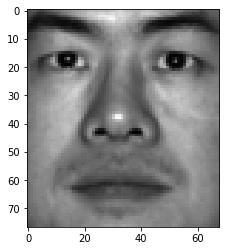

In [ ]:
from matplotlib import image # loads a library to work with images
from matplotlib import pyplot # loads a library to plot images
im1 = image.imread(path + dnam + '/' + fls[0]) # chooses 1st image from the image list
print(im1.shape) # prints the size in pixels of the chosen image 
pyplot.imshow(im1, cmap=pyplot.cm.gray) # displays the image
pyplot.show()

Create triaining data for ANN. 
making a n*m matrix where n= no of datum (1500) and m = h_pixels *v_pixels and storing the data in the files. 
Also defining the labels from filenames and storing it in an n*1 array.

In [ ]:
# loads a library for working with matrixes 
import numpy as np 

# m = h*w = (77*68=5236) is the number of pixels in images
m=im1.shape[0]*im1.shape[1]  

# creates a nxm-matrix of the images
images_data = np.zeros((n, m)) 

 # creates a n*1 matrix of targets which are the person labels 1 tp 30
images_target = np.zeros((n,)) 
# loops over all n=1500 images 
for i in range(0, n):
  filename = fls[i]  # loads a name of the image file
  img = image.imread(path + dnam + '/' + filename) # loads the image name
  images_data[i,:] = np.ravel(img) # vectorisation of the image 
  c = int(filename[5:7])  # extracts the class label from the file name
  images_target[i] = c  # assigns the target 

In [ ]:
# for i in range (0, n): #don't need to run thid
#   if i % 10 == 0:
#     print('> loaded %s %s %s' % (i, filename, c)) # prints the image name

Save the data (processed and made ready for classification

In [ ]:
from numpy import asarray # loads a library for saving matrices
from numpy import save
# save as a .npy file
fn = (path + '/' + 'yaleExtB_data.npy') # creates the file name for the image data
save(fn, images_data) 
fn = (path + '/' + 'yaleExtB_target.npy') # creates the file name for the targets
save(fn, images_target)

In [ ]:
# shows the files in the root, including 2 files *.npy 
!ls "/content/drive/My Drive/BidwatPhotosSample/"

Tr0  Tr0.zip  yaleExtB_data.npy  yaleExtB_target.npy
